In [1]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

from depth_h5py_gen import *

%load_ext autoreload
%autoreload 2

Accessing depth map at 'data_large/t/topiary_garden/00001667' in f:/datasets/places/train_large_places365standard_disparity_u8.hdf5...
0.0 367.06244
Accessed and reconstructed depth map at 'data_large/t/topiary_garden/00001667' with shape (500, 732)


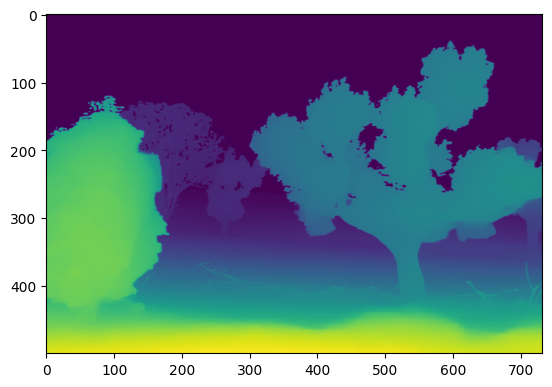

0.0 367.06244


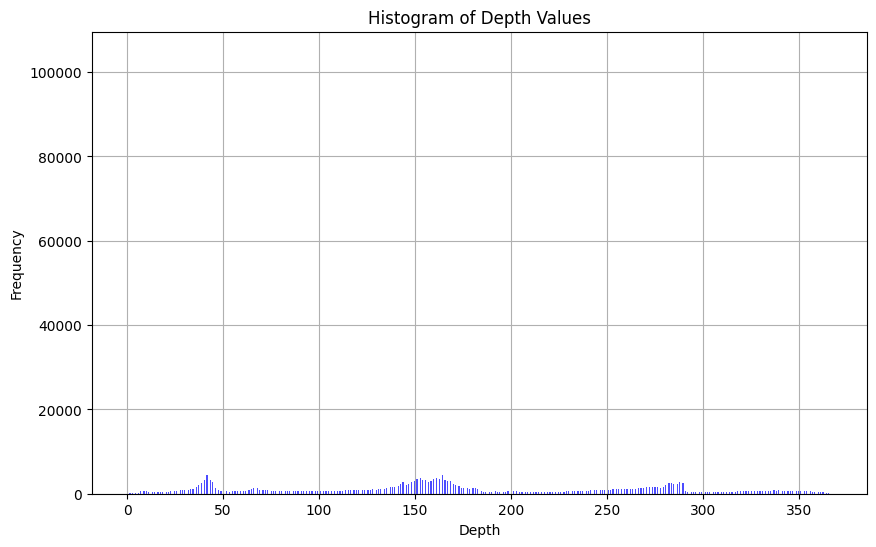

In [2]:
hdf5_file_path = "f:/datasets/places/train_large_places365standard_disparity_u8.hdf5"
depth_map_path = "data_large/t/topiary_garden/00001667"
depth_map = access_depth_map(hdf5_file_path, depth_map_path)
plt.imshow(depth_map)
plt.show()
hist_plot(depth_map)

Accessing depth map at '25999' in F:/datasets/celeba-hq-256/celeba-hq-256_disparity_u8.hdf5...
41.22066 357.0915
Accessed and reconstructed depth map at '25999' with shape (256, 256)


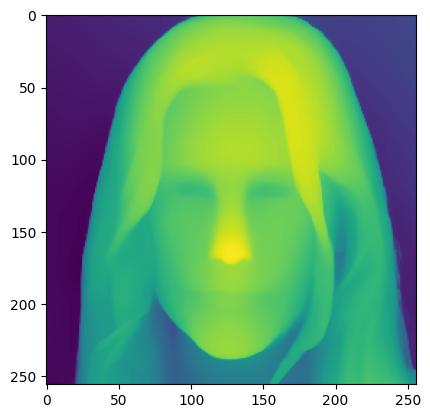

41.22066 357.0915


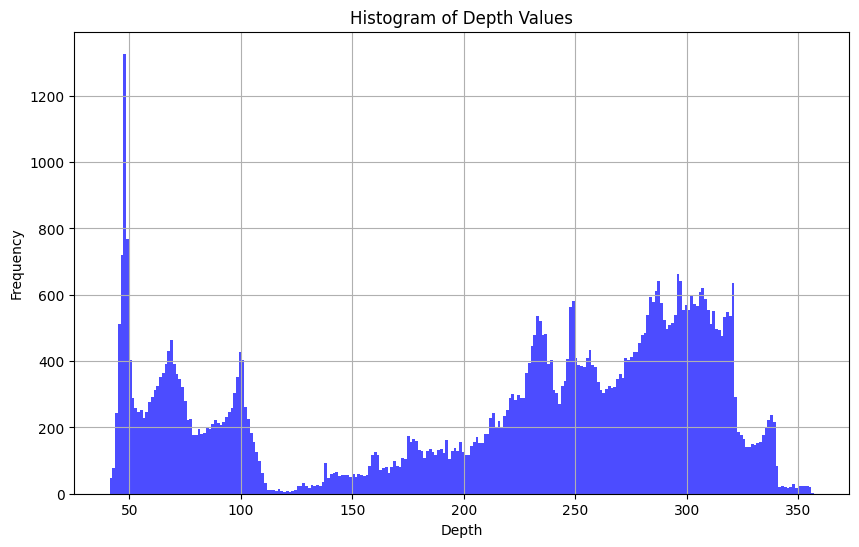

ModuleNotFoundError: No module named 'saicinpainting'

In [ ]:
hdf5_file_path = "F:/datasets/celeba-hq-256/celeba-hq-256_disparity_u8.hdf5"
depth_map_path = "25999"
depth_map = access_depth_map(hdf5_file_path, depth_map_path)
plt.imshow(depth_map)
plt.show()
hist_plot(depth_map)


Accessing depth map at 'data_large/t/topiary_garden/00001667' in f:/datasets/places/train_large_places365standard_disparity_u8.hdf5...
0.0 367.06244
Accessed and reconstructed depth map at 'data_large/t/topiary_garden/00001667' with shape (500, 732)
0.0 1.0


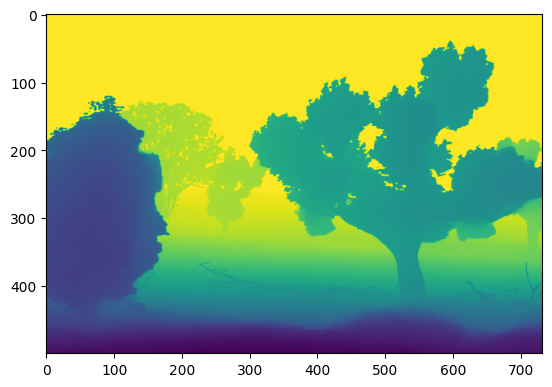

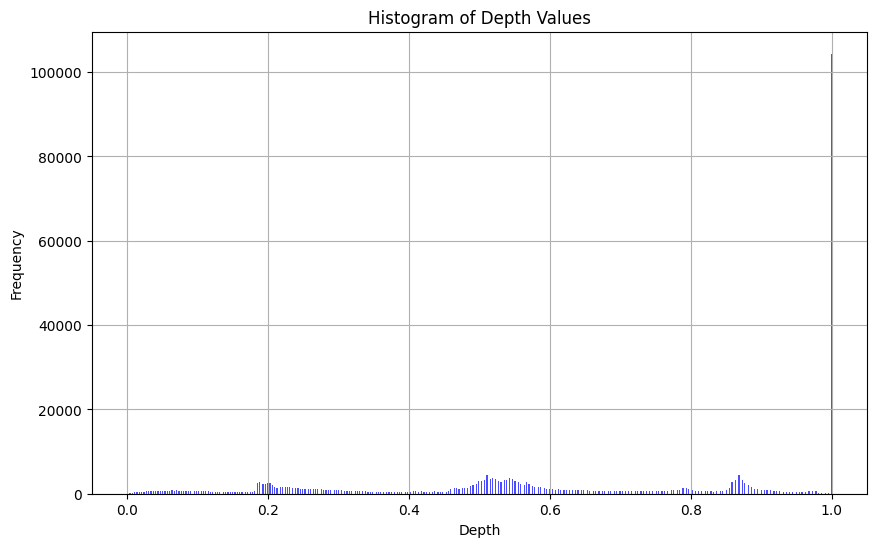

In [8]:
hdf5_file_path = "f:/datasets/places/train_large_places365standard_disparity_u8.hdf5"
depth_map_path = "data_large/t/topiary_garden/00001667"
depth_map = access_depth_map(hdf5_file_path, depth_map_path)

def normalize_depth(disparity_map):
    disparityf = disparity_map.astype(np.float32)
    disparity_not_zero = disparityf > 0.0
    disparity_zero = disparityf == 0.0
    true_depth = np.zeros(disparityf.shape)
    A = 1.0
    B = 0.0005
    max_depth = 1.0
    true_depth[disparity_not_zero] = 1/(A+B*disparityf[disparity_not_zero])
    true_depth[disparity_zero] = max_depth

    min_depth,max_depth = true_depth.min(), true_depth.max()
    true_depth_normalized = (true_depth - min_depth) / (max_depth - min_depth)
    return true_depth_normalized


normalized_depth_map = normalize_depth(depth_map)
plt.imshow(normalized_depth_map)
hist_plot(normalized_depth_map)